In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv')

x = df[['petal length (cm)', 'petal width (cm)']].values
y = df['target'].values

In [2]:
# standarize
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [3]:
# training
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_scaled, y)

print("Learned weights (W):")
print(model.coef_)

print("\nLearned biases (b):")
print(model.intercept_)

Learned weights (W):
[[-2.59069853 -2.3123567 ]
 [ 0.1332594  -0.468318  ]
 [ 2.45743913  2.7806747 ]]

Learned biases (b):
[-0.60010404  2.02943526 -1.42933122]


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [4]:
# accuracy
y_pred = model.predict(x_scaled)

accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy on training set: {accuracy * 100:.2f}%")


Accuracy on training set: 95.33%


In [5]:
# Generate meshgrid over feature space
x_min, x_max = x_scaled[:, 0].min() - 1, x_scaled[:, 0].max() + 1
y_min, y_max = x_scaled[:, 1].min() - 1, x_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict for each point in the grid
grid = np.c_[xx.ravel(), yy.ravel()]
grid_preds = model.predict(grid).reshape(xx.shape)

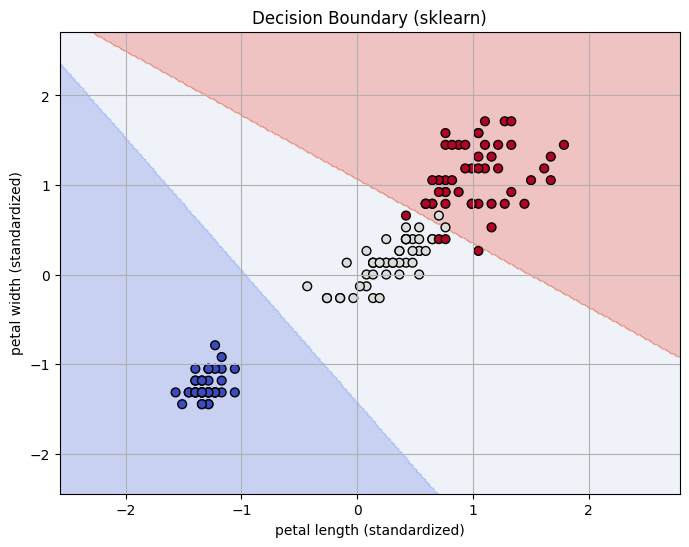

In [6]:
plt.figure(figsize=(8, 6))

# Plot decision regions
plt.contourf(xx, yy, grid_preds, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot training points
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y, edgecolors='k',
            cmap=plt.cm.coolwarm, s=40)

plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.title("Decision Boundary (sklearn)")
plt.grid(True)
plt.show()